In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

1. init random

In [107]:
np.random.seed(11)

2. init data

In [108]:
# init means
means = [[2, 2], [8, 3], [3, 6]]
# choose covarate is identity matrix
cov = [[1, 0], 
       [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

check

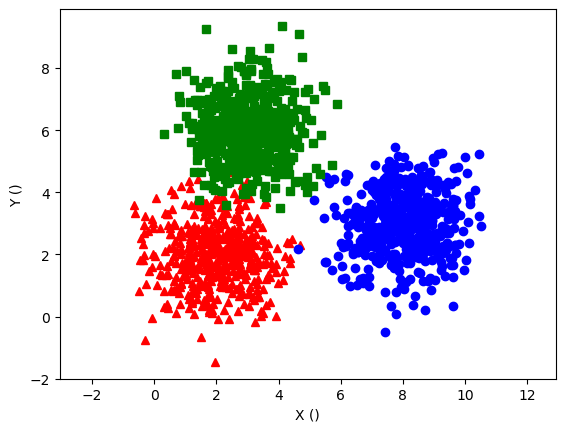

array([0, 0, 0, ..., 2, 2, 2])

In [109]:
# plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(X0.T[0], X0.T[1], 'r^')               # the fitting line
plt.plot(X1.T[0], X1.T[1], 'bo')               # the fitting line
plt.plot(X2.T[0], X2.T[1], 'gs')               # the fitting line
# plt.plot(X.T[0], X.T[1], 'ro')
# plt.axis([-10, 10, -10, 10])
plt.axis('equal')
plt.xlabel('X ()')
plt.ylabel('Y ()')
plt.show()
original_label

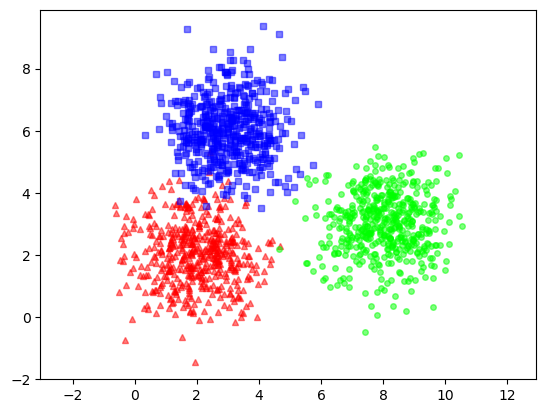

In [110]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], color='#ff0000', marker='^', linestyle='', markersize = 4, alpha = .5)
    plt.plot(X1[:, 0], X1[:, 1], color='#00ff00', marker='o', linestyle='', markersize = 4, alpha = .5)
    plt.plot(X2[:, 0], X2[:, 1], color='#0000ff', marker='s', linestyle='', markersize = 4, alpha = .5)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

processes:
1. `kmeans_init_centers`: init center M
2. `kmeans_assign_labels`: assign labels
3. `kmeans_update_centers`: update centers
4. `has_converged`: check anchor conditions

# Use numpy

In [111]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

main

In [112]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


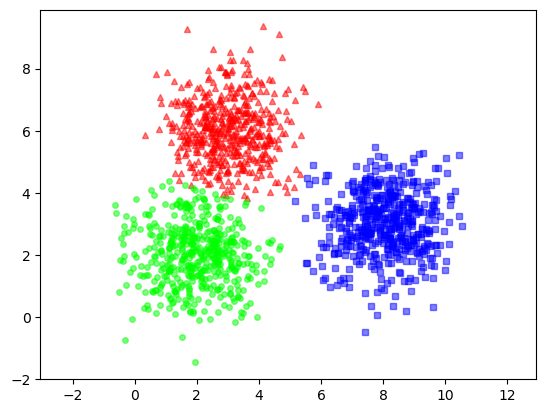

In [113]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

# Use scikit-learn

Centers found by scikit-learn:
[[8.01802292 2.99780722]
 [2.98986507 6.00648699]
 [2.05626402 2.07438566]]


/Users/hiepnq/conda/envs/learn-python/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


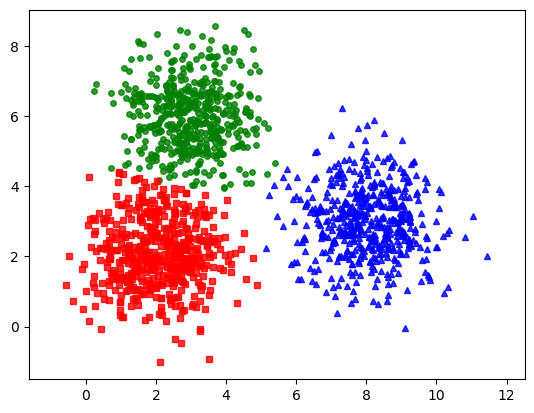

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)